<a href="https://colab.research.google.com/github/ybaseta/ex_curso_visio_image_deteccion_tools/blob/main/image_detection_tools_yba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio del curso de visio con ejemplos de herramientas para detección de bordes, texturas y más en imágenes

Saving How-to-Empower-More-People-to-Vote_hero-p2.webp to How-to-Empower-More-People-to-Vote_hero-p2.webp


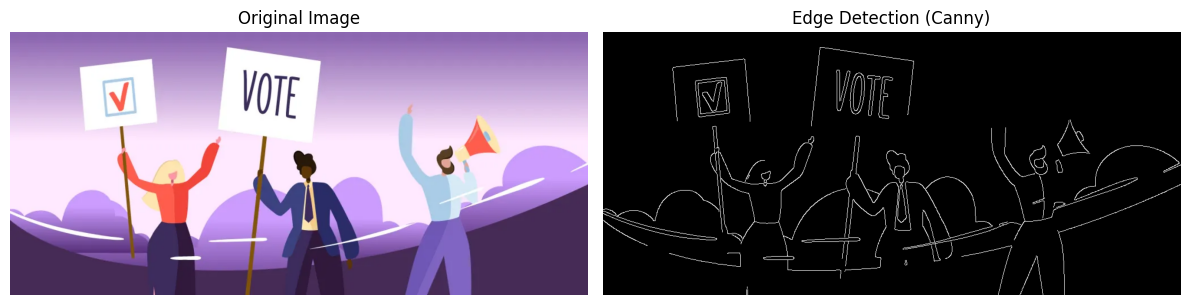

In [1]:
# Step 1: Install OpenCV (if not already installed)
!pip install opencv-python-headless

# Step 2: Import necessary libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from io import BytesIO



In [ ]:
# ejemplo de detección de bordes

# Step 3: Upload an image
uploaded = files.upload()

# Step 4: Read the uploaded image
for filename in uploaded.keys():
    image = Image.open(BytesIO(uploaded[filename]))
    image_np = np.array(image)

# Step 5: Convert to grayscale
gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

# Step 6: Apply Canny edge detection
edges = cv2.Canny(gray, threshold1=100, threshold2=200)

# Step 7: Display original and edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_np)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Edge Detection (Canny)")
plt.imshow(edges, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()

Saving Fondo 8M Factoría F5 2025.png to Fondo 8M Factoría F5 2025.png


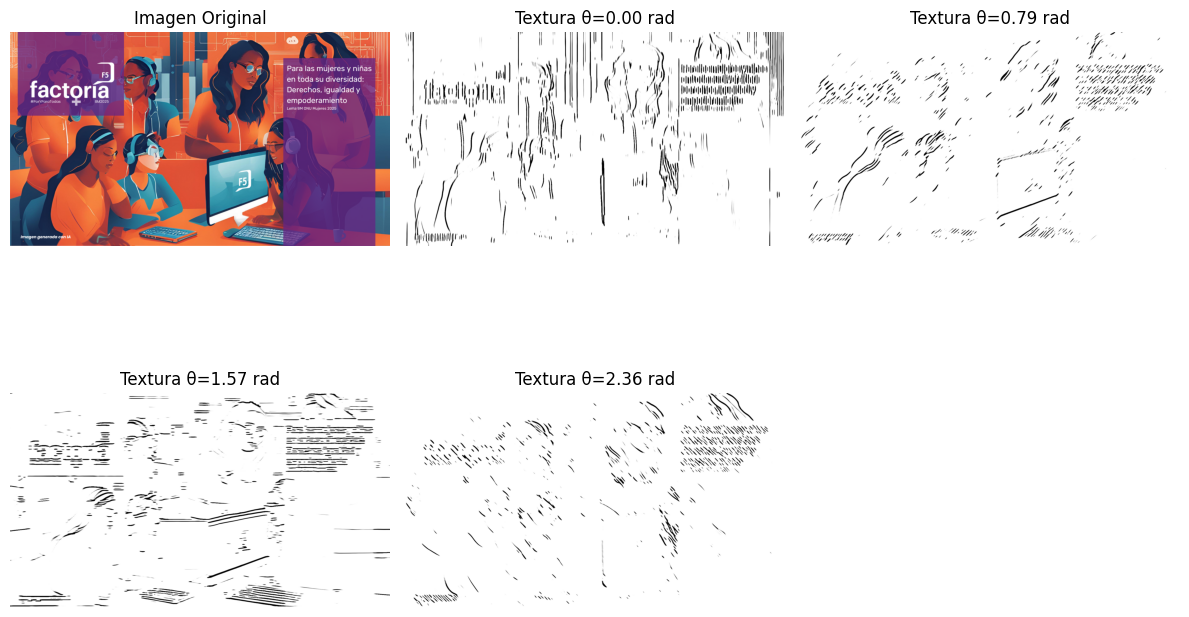

In [2]:
# Ejemplo detección texturas en imágenes

'''

# Paso 1: Instalar OpenCV si no está instalado
!pip install opencv-python-headless

# Paso 2: Importar librerías necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
from io import BytesIO

'''

# Paso 3: Subir una imagen
uploaded = files.upload()

# Paso 4: Leer la imagen
for filename in uploaded.keys():
    image = Image.open(BytesIO(uploaded[filename]))
    image_np = np.array(image)

# Paso 5: Convertir a escala de grises
gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

# Paso 6: Crear y aplicar un filtro de Gabor
def apply_gabor_filter(img, ksize=31, sigma=4.0, theta=0, lambd=10.0, gamma=0.5):
    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lambd, gamma, 0, ktype=cv2.CV_32F)
    filtered = cv2.filter2D(img, cv2.CV_8UC3, kernel)
    return filtered

# Aplicar el filtro en varias orientaciones
orientations = [0, np.pi/4, np.pi/2, 3*np.pi/4]
filtered_images = [apply_gabor_filter(gray, theta=theta) for theta in orientations]

# Paso 7: Mostrar resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Imagen Original")
plt.imshow(image_np)
plt.axis("off")

for i, filtered in enumerate(filtered_images):
    plt.subplot(2, 3, i+2)
    plt.title(f"Textura θ={orientations[i]:.2f} rad")
    plt.imshow(filtered, cmap='gray')
    plt.axis("off")

plt.tight_layout()
plt.show()